# Welcome to the tutorial!
In this tutorial you will learn how to generate simulations of collisions, as done in the particle detectors such as the LHC.



In [1]:
import collide

You can generate an event using a simple interface. Just call ``collide.generate_event()``. You can optionally pass the type of process that you would like to generate, the random seed and now many events you would like to generate.

In [2]:
help(collide.generate_event)

Help on function generate_event in module collide.event:

generate_event(process=None, seed=None, n_events=None)
    Generate events with pythia.
    Args:
        process: the physics process to be generated. You can check the
                 available processes by calling available_processes()
        seed: the random seed that will be used to generate the event.
        n_events: how many events pythia should generate.
    
    Returns:
        A list with n_events Events.



In [3]:
collide.generate_event('Top')

[<Event with 1605 particles>]

In [40]:
dark_matter_event = collide.generate_event('DarkMatter', seed=3423)[0]

In [58]:
import matplotlib.pyplot as plt
def normalize_var_for_plot(variable):
    normalized = variable/(variable.median())
    normalized.loc[normalized>1.] = 1.
    return normalized

In [74]:
import seaborn as sns
#palette = sns.cubehelix_palette(8, start=.5, hue=1.,rot=-.75, dark=0.3, as_cmap=True,reverse=True)
palette = sns.color_palette("flare_r", as_cmap=True)

def plot_line(df, ax):
    ax.plot([df['Vx'], df['Vx_decay']],
            [df['Vy'], df['Vy_decay']], 
             color=df['color'], linewidth=df['width'])
    
def plot_energy_weight(trajectories = dark_matter_event.trajectories):
    color_scale = normalize_var_for_plot(trajectories.E)
    
    trajectories['color'] = color_scale.apply(lambda x: palette.colors[int(255*x)])
    trajectories['width'] = 1 + 1.5*color_scale
    
    fig, ax = plt.subplots(figsize=(7, 7))
    
    trajectories.T.apply(lambda x: plot_line(x, ax))
    
    ax.axis('off')
    ax.axis('tight')
    ax.axis('image')
    return ax

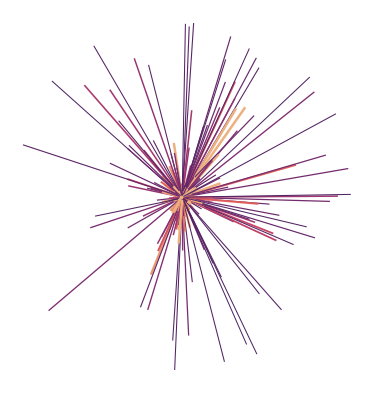

In [75]:
ax = plot_energy_weight()

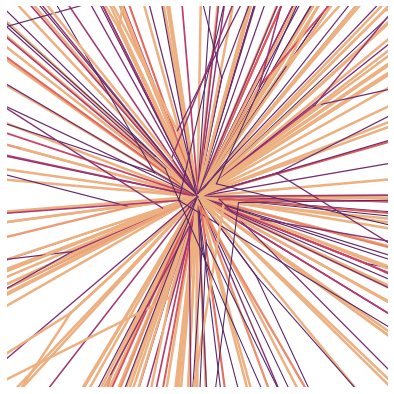

In [76]:
ax.set_ylim(-1e-4, 1e-4)
ax.set_xlim(-1e-4, 1e-4)
ax.get_figure()

In [ ]:
ax.get_figure()

In [ ]:
dark_matter_event.particles

In [ ]:
dark_matter_event.mothers[dark_matter_event.mothers['mother_id'] == 1]

In [ ]:
dark_matter_event.mothers

In [ ]:
dark_matter_event.mothers

You can check the available processes using the ``collide.available_processes()`` function.

In [ ]:
collide.available_processes()

In [ ]:
dark_matter_events[0]

In [ ]:
dark_matter_events[2]

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(ev.particles)

In [ ]:
ev.mothers

In [ ]:
ev.daughters